In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

4422102/4422102 [==============================] - 0s 0us/step


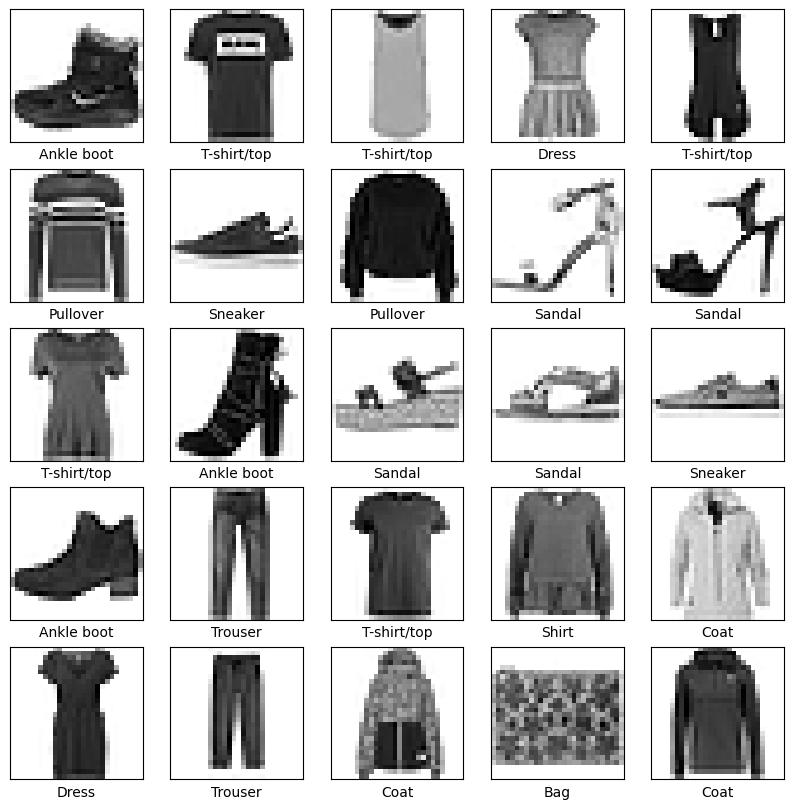

In [2]:
# Step 1: Data Visualization and Preprocessing
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Visualize the distribution of different fashion items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the images for FCNN input
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [4]:
# Step 2: Model Architecture and Development
model = models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Step 3: Model Training
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 15s 9ms/step - loss: 0.7163 - accuracy: 0.7678 - val_loss: 0.5232 - val_accuracy: 0.8215
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4894 - accuracy: 0.8323 - val_loss: 0.4752 - val_accuracy: 0.8332
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4432 - accuracy: 0.8463 - val_loss: 0.4504 - val_accuracy: 0.8435
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4159 - accuracy: 0.8556 - val_loss: 0.4184 - val_accuracy: 0.8537
Epoch 5/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3945 - accuracy: 0.8634 - val_loss: 0.4347 - val_accuracy: 0.8440
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3788 - accuracy: 0.8675 - val_loss: 0.4148 - val_accuracy: 0.8540
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3654 - accuracy: 0.8723 - val_loss: 0.3730 - val_ac

In [6]:
# Step 4: Performance Evaluation
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3716 - accuracy: 0.8664
Test accuracy: 0.8664


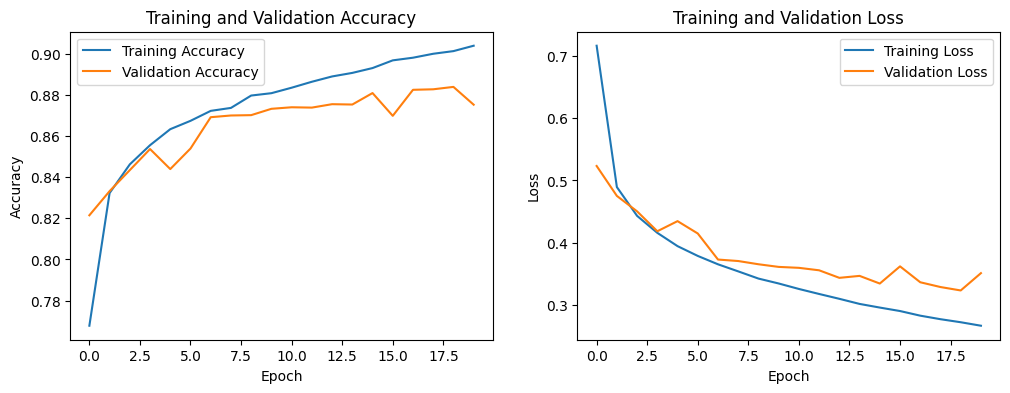

In [7]:
# Visualize training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()